## ADULT DATASET MACHINELEARNING PROJECT

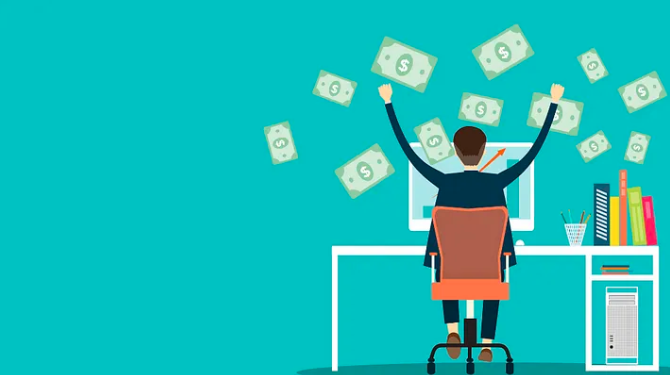

###### Name: FARSHANA P

###### Organization: Entri Elevate

###### Date:

### Introduction

The Adult Dataset, also referred to as the "Census Income Dataset", is a widely used dataset in data science and machine learning, especially for tasks related to classification and regression. It originates from the UCI Machine Learning Repository and contains information about individuals from the 1994 U.S. Census. The primary objective of this dataset is to predict whether an individual earns more than $50,000 per year based on their attributes.

### Data Description


Source: UCI Machine Learning Repository

Number of Instances: 32561 

Number of Features: 15 

Target Variable: income

### Attributes:

> Age: Continuous numeric value

>Workclass: Type of employment (e.g., Private, Self-emp-not-inc, Federal-gov)>

>Fnlwgt: Final weight, a calculated measure based on the sampling process.

>Education: Education level (e.g., Bachelors, HS-grad).

>Education-num: Number of years of education (numeric representation of education).

>Marital-status: Marital status (e.g., Married-civ-spouse, Never-married).

>Occupation: Type of job (e.g., Tech-support, Craft-repair).

>Relationship: Relationship status (e.g., Husband, Not-in-family).

>Race: Race (e.g., White, Black).

>Sex: Gender (e.g., Male, Female).

>Capital-gain: Income from capital gains (continuous numeric value).


>Capital-loss: Loss from capital (continuous numeric value)

>Hours-per-week: Hours worked per week (e.g., 40, 50).

>Native-country: Country of origin (e.g., United States, Mexico).

#### DATA FORMAT

>The dataset is often provided as a .csv file.

>It includes both categorical and numerical data.


#### Challenges:

>Handling imbalanced data

>Addressing missing values, as some entries are marked with ? for categorical attributes.

#### Importing necessary libraries 

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
import warnings
warnings.filterwarnings("ignore") 

In [157]:
from sklearn.preprocessing import PowerTransformer,StandardScaler, LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE, chi2
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer


In [158]:
from scipy.stats import skew,kurtosis
from sklearn.tree import DecisionTreeClassifier

In [159]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

##### Load dataset into a DataFrame


In [160]:
data=pd.read_csv("adult.csv")

In [161]:
df=pd.DataFrame(data)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### over view

In [162]:
data.info

<bound method DataFrame.info of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      

In [163]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [164]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [165]:
df.shape

(32561, 15)

In [166]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Data Preprocessing - Data Cleaning

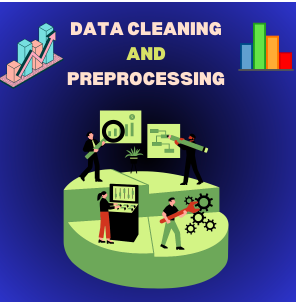

#### > Handling missing data and duplicates

In [167]:
df.duplicated().sum()

24

In [168]:
# Data Cleaning
# Replace "?" with NaN
data.replace('?', np.nan, inplace=True)


In [169]:
# Drop rows with missing values
data.dropna(inplace=True)



In [170]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [171]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [172]:
df.duplicated().sum()

24

In [173]:
df.shape

(32561, 15)

### Visualizations 

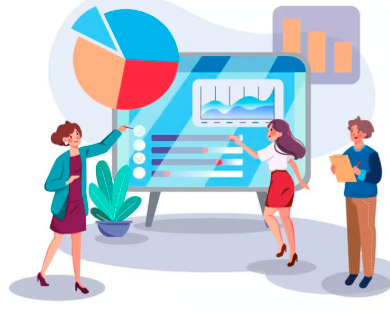

##### FIND OUTLIERS(DRAW BOXPLOT,GRP THE NUMERICAL COLUMNS)

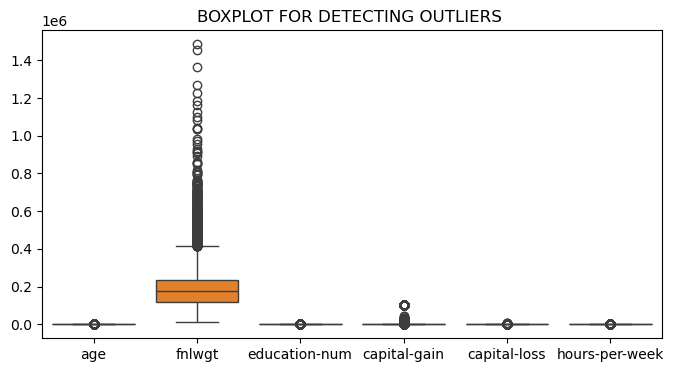

In [174]:
plt.figure(figsize=(8,4))
sns.boxplot(df)
plt.title('BOXPLOT FOR DETECTING OUTLIERS ')
plt.show()

In [175]:
def handling_outliers(data):
    # Ensure data is a DataFrame
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a Pandas DataFrame")

    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        # Example logic to handle outliers (replace with your logic)
        df[col] = df[col].clip(lower=q1 - 1.5 * iqr, upper=q3 + 1.5 * iqr)
    return df

# Call the function
df1 = handling_outliers(data)
print(df1)


       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors           13.0   
1       50  Self-emp-not-inc   83311   Bachelors           13.0   
2       38           Private  215646     HS-grad            9.0   
3       53           Private  234721        11th            7.0   
4       28           Private  338409   Bachelors           13.0   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm           12.0   
32557   40           Private  154374     HS-grad            9.0   
32558   58           Private  151910     HS-grad            9.0   
32559   22           Private  201490     HS-grad            9.0   
32560   52      Self-emp-inc  287927     HS-grad            9.0   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

In [176]:
df1 = handling_outliers(df)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [177]:
df1.shape

(32561, 15)

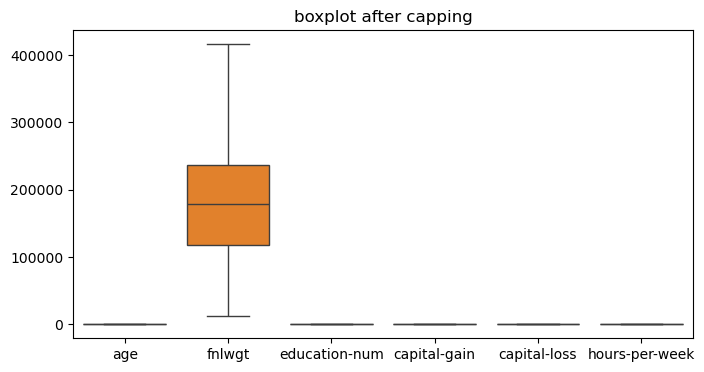

In [178]:
plt.figure(figsize=(8,4))
sns.boxplot(df1)
plt.title('boxplot after capping')
plt.show()

In [179]:
df1.shape

(32561, 15)

In [180]:
# HISTPLOT

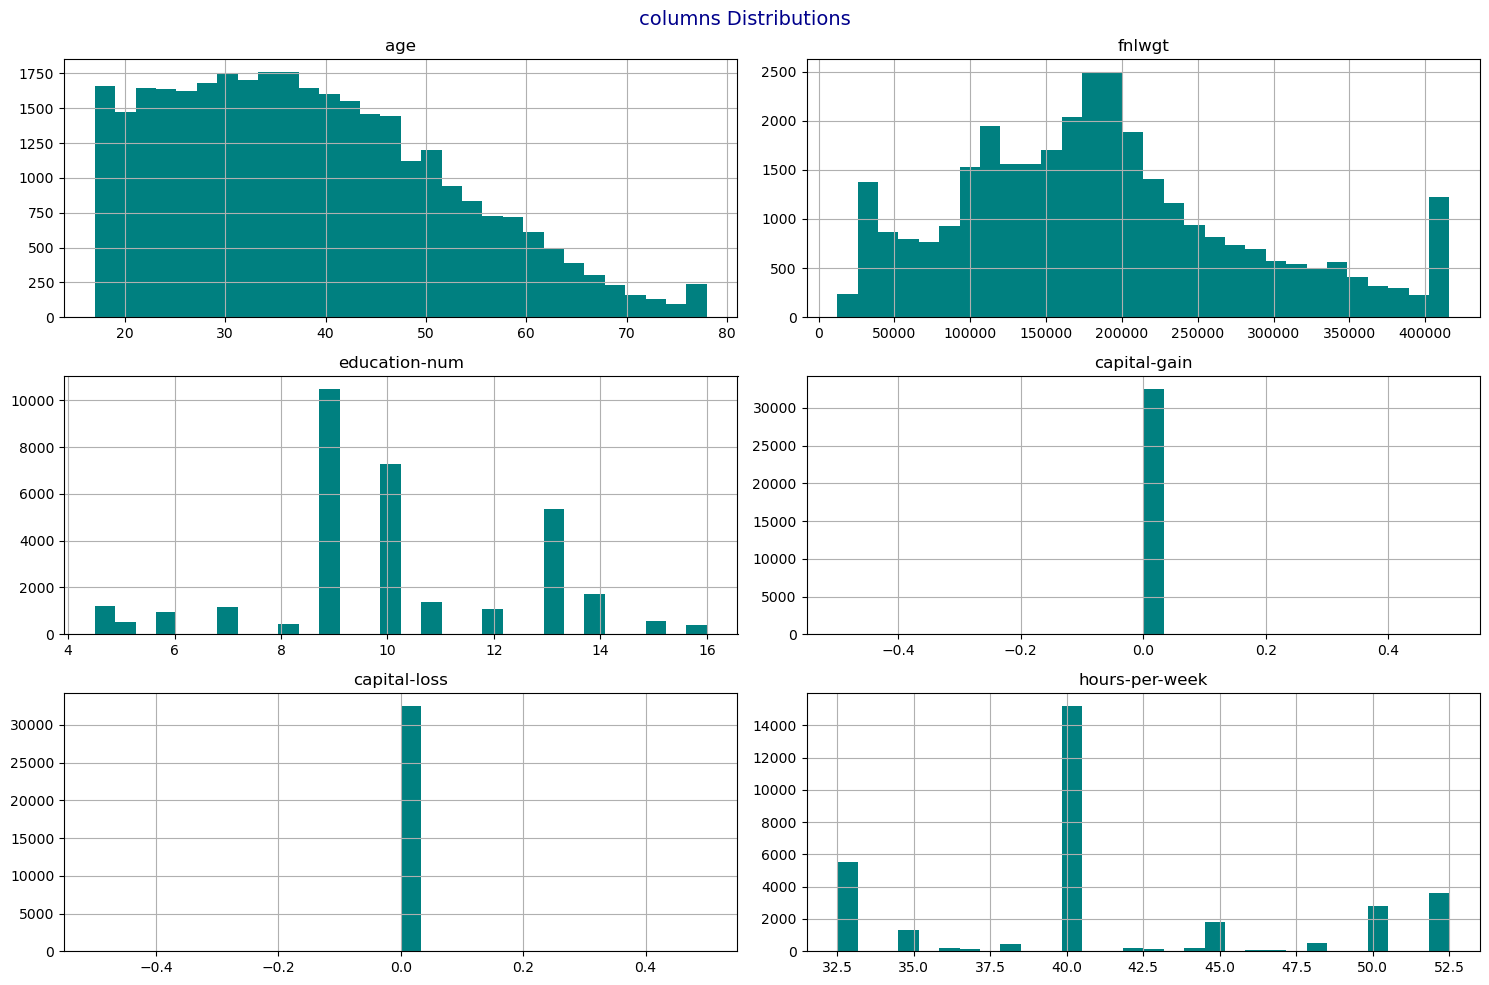

In [181]:
df1.hist(bins = 30,figsize = (15,10),color = 'teal')
plt.suptitle("columns Distributions",fontsize = 14,color = 'Darkblue')
plt.tight_layout()
plt.show()

###### FIND SKEWNESS

In [182]:
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
from scipy.stats import skew

for col in numerical_columns:
    skewness_value = skew(data[col].dropna()) 
    
    # Drop NaN values for accurate calculation
    
    print(f'Skewness of {col}: {skewness_value:.4f}')

Skewness of age: 0.5302
Skewness of fnlwgt: 1.4591
Skewness of education-num: -0.3054
Skewness of capital-gain: 11.9021
Skewness of capital-loss: 4.5262
Skewness of hours-per-week: 0.3309


<Axes: ylabel='Count'>

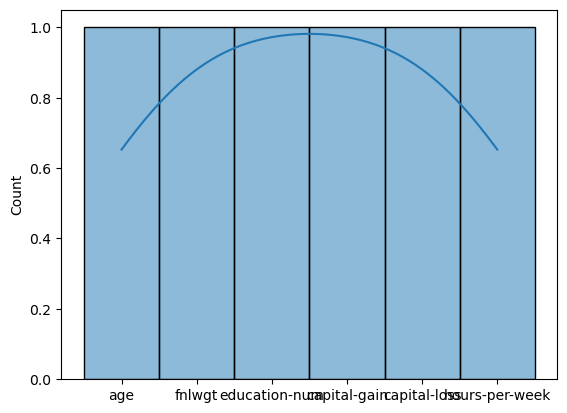

In [183]:
sns.histplot(data = numerical_columns, kde = True)

##### CORRELATION HEATMAP

In [184]:
df_encoded=pd.get_dummies(df1,drop_first=True)
df_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13.0,0,0,40.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13.0,0,0,32.5,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12.0,0,0,38.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
32557,40,154374,9.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
32558,58,151910,9.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
32559,22,201490,9.0,0,0,32.5,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [185]:
corr_matrix=df_encoded.corr()
corr_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
age,1.000000,-0.077372,0.047207,NaN,NaN,0.091254,0.061192,-0.019454,-0.198950,0.103257,...,0.008080,0.002636,0.000163,-0.013826,-0.006265,0.004920,0.016118,-0.015060,0.000420,0.235865
fnlwgt,-0.077372,1.000000,-0.039574,NaN,NaN,-0.025518,-0.001246,0.005015,0.043206,-0.025137,...,0.008504,-0.003610,-0.012180,-0.000900,-0.000658,0.002719,-0.078062,-0.011239,0.004730,-0.008387
education-num,0.047207,-0.039574,1.000000,NaN,NaN,0.184738,0.100410,-0.015645,-0.121099,0.078803,...,-0.038825,0.000981,0.016029,0.051041,0.007841,-0.017249,0.077097,-0.006290,-0.001402,0.342274
capital-gain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Trinadad&Tobago,0.004920,0.002719,-0.017249,NaN,NaN,-0.004388,-0.001148,-0.000354,0.002093,0.002438,...,-0.001432,-0.000464,-0.001199,-0.000957,-0.000568,1.000000,-0.070869,-0.001097,-0.000536,-0.007660
native-country_United-States,0.016118,-0.078062,0.077097,NaN,NaN,0.017081,0.033196,0.005000,-0.043184,-0.004850,...,-0.173848,-0.056315,-0.145558,-0.116167,-0.068978,-0.070869,1.000000,-0.133180,-0.065031,0.034470
native-country_Vietnam,-0.015060,-0.011239,-0.006290,NaN,NaN,-0.013919,-0.003611,-0.000666,0.009290,-0.004829,...,-0.002692,-0.000872,-0.002254,-0.001799,-0.001068,-0.001097,-0.133180,1.000000,-0.001007,-0.017649
native-country_Yugoslavia,0.000420,0.004730,-0.001402,NaN,NaN,0.007338,-0.000161,-0.000325,0.005571,0.003440,...,-0.001314,-0.000426,-0.001100,-0.000878,-0.000521,-0.000536,-0.065031,-0.001007,1.000000,0.006959


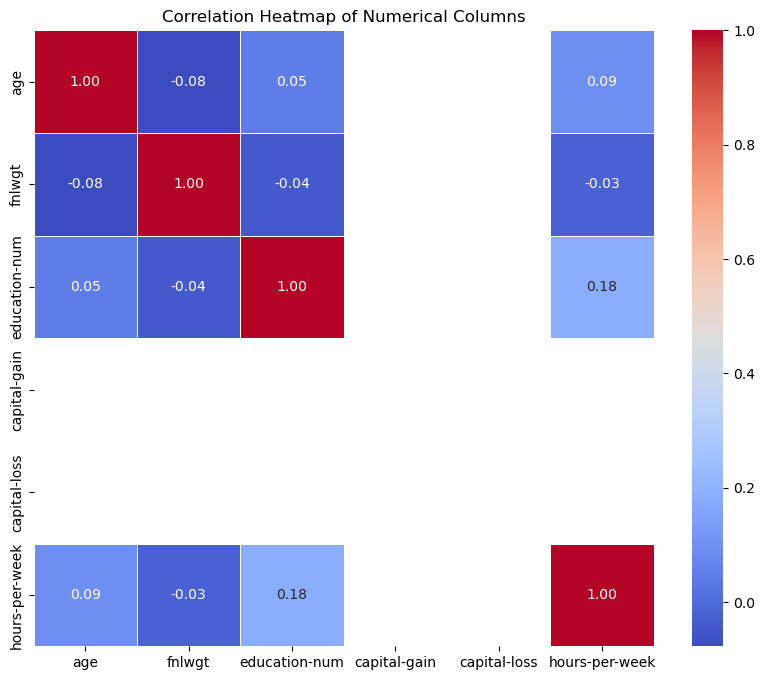

In [186]:
# Select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [187]:

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

# Handle missing values in categorical columns
df[categorical_columns] = df[categorical_columns].fillna("Unknown")

# Encode categorical columns using one-hot encoding (example)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Show a summary of the new encoded dataset
print("Shape of encoded dataset:", df_encoded.shape)
print(df_encoded.head())


Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Shape of encoded dataset: (32561, 101)
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516           13.0             0             0            40.0   
1   50   83311           13.0             0             0            32.5   
2   38  215646            9.0             0             0            40.0   
3   53  234721            7.0             0             0            40.0   
4   28  338409           13.0             0             0            40.0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False              False   
1                False                   False              False   
2                False                   False               True   
3                False                   False               True   
4             

##### HEATMAP

##### DISTRIBUTION  OF NUMERICAL FEATURES

###### COUNTPLOT FOR CATEGORICAL VARIABLES

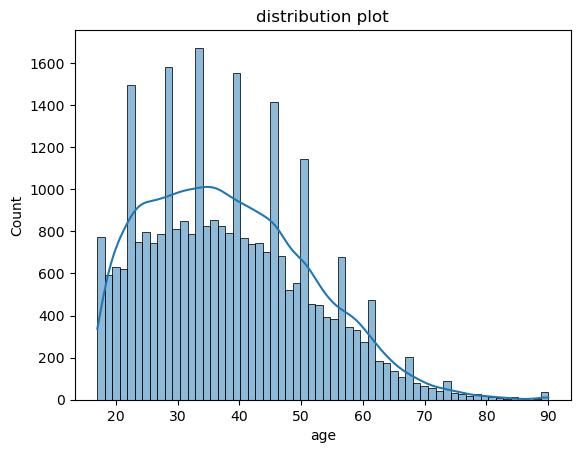

In [188]:
sns.histplot(data=data,x=data.age,kde=True)
plt.title('distribution plot')
plt.show()


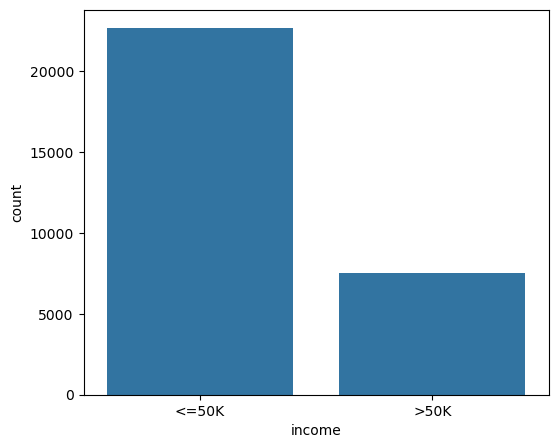

In [189]:
plt.figure(figsize=(6, 5))
sns.countplot(x='income',data=data)
plt.show()

###### SCATTER PLOT

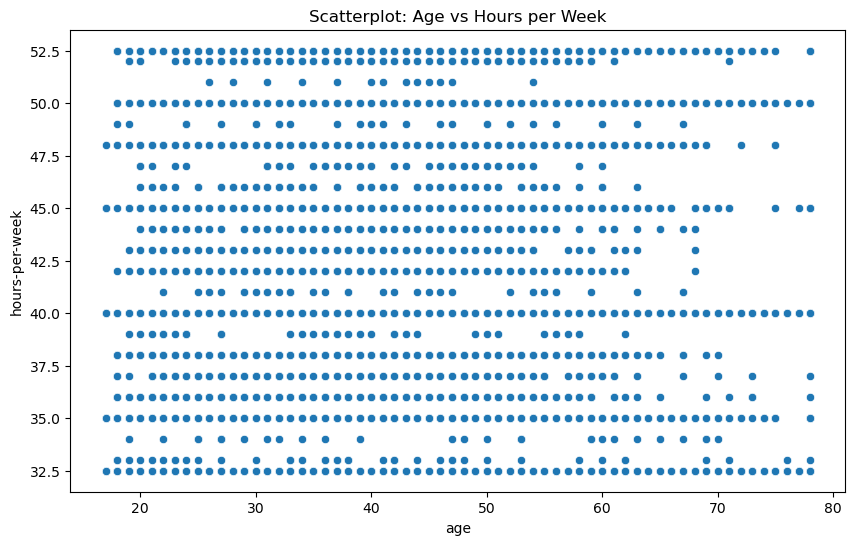

In [190]:
# Scatter plot of age vs hours-per-week


plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='hours-per-week', data=df_encoded)
plt.title("Scatterplot: Age vs Hours per Week")
plt.show()

In [191]:
from scipy.stats import kurtosis
for col in numerical_columns:
    kurtosis_value = kurtosis(data[col].dropna(), fisher=True)  
    
    # Drop NaN values for accurate calculation
    print(f'Kurtosis of {col}: {kurtosis_value:.4f}')

Kurtosis of age: -0.1448
Kurtosis of fnlwgt: 6.3929
Kurtosis of education-num: 0.6434
Kurtosis of capital-gain: 153.6407
Kurtosis of capital-loss: 19.5074
Kurtosis of hours-per-week: 3.1672


#### Unique value of target variable

In [192]:
target_value=df['income'].value_counts()     #WE GOT TARGET VALUE IS IMBALANCED(Y VALUE DOING OVER SAMPLING)
target_value

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

#### Imbalanced Data: Overview
Imbalanced data occurs when one class (or category) in the target variable significantly outnumbers the other

In [193]:
from imblearn.over_sampling import SMOTE

In [194]:
smote=SMOTE(random_state=42)

#### STEP 1:Split data into features and target

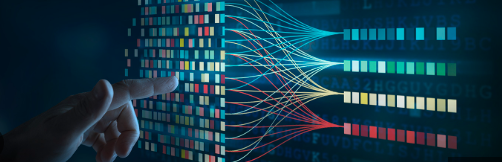

Features (X): These are the input variables (independent variables) used to predict the target. Typically, features are stored in a dataframe or array without the target column.

Target (y): This is the output variable (dependent variable) that you aim to predict

In [195]:
X = data.drop('income', axis = 1)
y = data['income']

In [196]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [197]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, Length: 30162, dtype: object

#### Split data into training and testing sets

Splitting data into training and testing sets is an essential step in machine learning to evaluate the performance of your model
Using train_test_split from sklearn.

###### Key Parameters:
>test_size: Proportion of the data to be used as the test set (e.g., 0.2 means 20% for testing, 80% for training).

>random_state: Ensures reproducibility by fixing the random seed.

>train_size:specify the size of the training set (e.g., train_size=0.8).

In [198]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [199]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply to all categorical columns
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])  # Use same encoder


In [200]:
X_train_resambled,y_train_resambled=smote.fit_resample(X_train,y_train)

In [201]:
print(X_train_resambled.shape)
print(y_train_resambled.shape)

(36302, 14)
(36302,)


In [202]:
target_value_resambled=y_train_resambled.value_counts()     
target_value_resambled

income
<=50K    18151
>50K     18151
Name: count, dtype: int64

In [203]:
y_test.shape

(6033,)

### Step 2: Feature Selection (on Training Set)

#### Feature Selection (SelectKBest with Chi-Square)

Selects the top 5 features most relevant to the target variable.
Uses chi-square test, best for categorical targets.

In [204]:
# Select top 5 features
feature_selector = SelectKBest(chi2, k=5)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)


In [205]:
# Get selected feature names
selected_features = X_train.columns[feature_selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')


### Step 3:Scaling (StandardScaler)

Standardizes selected features to zero mean & unit variance.
Improves performance for models like Logistic Regression, SVM, Neural Networks.


In [206]:
# Step 3: Scaling (on Selected Features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


In [207]:

# Final Training and Testing Sets
print("Final Training Set Shape:", X_train_scaled.shape)
print("Final Testing Set Shape:", X_test_scaled.shape)

Final Training Set Shape: (24129, 5)
Final Testing Set Shape: (6033, 5)


#### MinMax Scaling

MinMax Scaling is a normalization technique that transforms features by scaling them to a specific range, typically [0, 1]. It ensures all features have the same scale, which can improve the performance of certain machine learning algorithms.

#### When to Use MinMax Scaling

##### Works best for algorithms sensitive to feature magnitude, such as:
>K-Nearest Neighbors (KNN)

>Support Vector Machines (SVM)

>Principal Component Analysis (PCA)

>Neural Network

Not needed for tree-based algorithms (e.g., Decision Trees, Random Forests).

In [208]:
 #Apply MinMax Scaling
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the scaled dataset
print(df.head())

        age         workclass    fnlwgt  education  education-num  \
0  0.360656         State-gov  0.161622  Bachelors       0.739130   
1  0.540984  Self-emp-not-inc  0.175980  Bachelors       0.739130   
2  0.344262           Private  0.503865    HS-grad       0.391304   
3  0.590164           Private  0.551127       11th       0.217391   
4  0.180328           Private  0.808034  Bachelors       0.739130   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0           0.0           0.0           0.375  United-States  <=50K  


### Step 4: Model Training

##### 1 Algorithm:
Classification: Logistic Regression, Random Forest, Support Vector Machine (SVM), Gradient Boosting,Decision Tree etc.

##### 2 Train the Model:
Fit the selected algorithm to your training data.


In [209]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

results = {}


In [210]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)


### Step 5: Model Evaluation

##### 1> Make Predictions:

>Once the model is trained, you can make predictions on the test data.


##### 2> Evaluate the Model:

>Accuracy (for classification)

>Precision, Recall, F1-Score (especially for imbalanced data)

>ROC-AUC, PR-AUC (for binary classification)

>MSE, RMSE (for regression)

In [211]:
 # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
results[name] = accuracy
print(f"Model: {name}")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Model: Support Vector Machine
Accuracy: 0.7820321564727333
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.77      1.00      0.87      4503
        >50K       0.99      0.14      0.25      1530

    accuracy                           0.78      6033
   macro avg       0.88      0.57      0.56      6033
weighted avg       0.83      0.78      0.71      6033



In [212]:
results = pd.DataFrame({
    'Model': [models],
    'Accuracy': [accuracy]
})

In [213]:
results = results.sort_values(by='Accuracy', ascending=False)

print(results)

                                               Model  Accuracy
0  {'Random Forest': (DecisionTreeClassifier(max_...  0.782032


In [214]:
best_model_name = results['Model'].iloc[0]
best_accuracy = results['Accuracy'].iloc[0]

In [215]:
best_model_name

{'Random Forest': RandomForestClassifier(random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Support Vector Machine': SVC(random_state=42)}

In [216]:
best_accuracy

0.7820321564727333

### Step 6: Model Tunning

##### HYPERPARAMETER TUNNING WITH SVC

###### Hyperparameter tuning helps optimize model performance by selecting the best parameters. For SVC (Support Vector Classifier), key hyperparameters include:

>C (Regularization): Controls the trade-off between margin size and misclassification.

>Gamma (for 'rbf' and 'poly' kernels): Determines the influence of a single training example.

>Kernel: Defines the transformation of input space (e.g., 'linear', 'rbf', 'poly', 'sigmoid')

In [217]:
param_distributions = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [218]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf']  # Kernel types
}

##### Grid Search CV for SVC
Uses exhaustive search over a parameter grid with cross-validation.

In [243]:
# Create an SVC model
svc = SVC()

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, verbose=1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and cross-validation accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8065398483153053


In [244]:
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [245]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Convert to percentage
accuracy_percentage = accuracy * 100

# Print the accuracy
print(f"Model Accuracy: {accuracy_percentage:.2f}%")

Model Accuracy: 80.51%


### Pipeline Overview
A pipeline sequentially applies transformations and a final estimator to your data. 

In [246]:
from sklearn.pipeline import Pipeline

In [247]:
pipeline = Pipeline([('scaler',StandardScaler()),('classifier',SVC())])
pipeline.fit(X_train_scaled,y_train)           #train the pipeline


Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

In [248]:
# After training the model, we use it to make predictions on the unseen test da
y_pred=pipeline.predict(X_test_scaled)


In [249]:
# Evaluate the pipeline
accuracy_pipeline = accuracy_score(y_test, y_pred)
print(f"Accuracy of the pipeline: {accuracy_pipeline}")

Accuracy of the pipeline: 0.8050721034311288


In [250]:
# Initialize and train the model
model = RandomForestClassifier(random_state = 42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [251]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

#### Unseen Data in Machine Learning
Unseen data refers to new data that the model has never encountered during training. It is crucial for evaluating model performance and ensuring generalization to real-world scenarios.


### Test with unseen

##### save the trained pipeline

In [252]:
import joblib
joblib.dump(pipeline,'pipeline.joblib')


['pipeline.joblib']

##### Load the trained pipeline

In [253]:
load_model = joblib.load('pipeline.joblib')

In [254]:
unseen_data=pd.read_csv('unseen _data.csv')

In [255]:

unseen_df=pd.DataFrame(unseen_data)
unseen_df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,23,Private,217961,HS-grad,9,Never-married,Craft-repair,Unmarried,White,Male,0,0,45,US
1,43,Self-emp-not-inc,350387,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States
2,46,Private,325372,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States


In [256]:
unseen_df.shape

(19, 14)

In [257]:
unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19 non-null     int64 
 1   workclass       19 non-null     object
 2   fnlwgt          19 non-null     int64 
 3   education       19 non-null     object
 4   education-num   19 non-null     int64 
 5   marital-status  19 non-null     object
 6   occupation      19 non-null     object
 7   relationship    19 non-null     object
 8   race            19 non-null     object
 9   sex             19 non-null     object
 10  capital-gain    19 non-null     int64 
 11  capital-loss    19 non-null     int64 
 12  hours-per-week  19 non-null     int64 
 13  native-country  19 non-null     object
dtypes: int64(6), object(8)
memory usage: 2.2+ KB


In [258]:
# Apply OneHotEncoder to the unseen data
le = LabelEncoder()
for col in unseen_df.columns:
  if unseen_df[col].dtype == 'object':
    unseen_df[col] = le.fit_transform(unseen_df[col])

In [259]:
le

LabelEncoder()

In [260]:
scaler = StandardScaler()
scaler.fit(X_train)  #

StandardScaler()

In [261]:
unseen_df = unseen_df.select_dtypes(include=['number'])  # Keep only numeric columns
X_test_unseen_scaled = scaler.transform(unseen_df)

In [262]:
unseen_df.shape

(19, 14)

In [263]:

# Evaluate the model on the unseen data
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on unseen data: {accuracy * 100:.2f}%')


Accuracy on unseen data: 80.51%


In [264]:
# Predict using the trained model
income_prediction = model.predict(unseen_df)

# Output the prediction result
print("Predicted income (0=<=50K, 1=>50K):", income_prediction[0])


Predicted income (0=<=50K, 1=>50K): <=50K


In [265]:
print(f"Raw prediction: {income_prediction[0]}, Type: {type(income_prediction[0])}")

Raw prediction: <=50K, Type: <class 'str'>


In [266]:
income_labels = {'<=50K': 0, '>50K': 1}

# Get the predicted label using the string directly
predicted_income_label = income_labels.get(income_prediction[0], "Unknown")

print(f"Predicted income (label): {predicted_income_label}")

Predicted income (label): 0
